In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

In [90]:
class state(object):    
    """The state class which is used to construct a state object which in this instance represents a 
    position in the grid defined by its x and y co-ordinates.
    The class contains information such
    self.x: (int)The x co-ordinate of the state on the grid
    self.y: (int)The y co-ordinate of the state on the grid
    self.loc: (tuple) the actual position of the state on the grid (x,y)
    self.reward: (float) Reward associated with the state
    self.isReachable: (boolean) True if the state is reachable. Unreachable states are blocked by obstacles
    self.isTerminalState: (boolean) True if the the goal location or the fire location
    self.isStartLocation: (boolean) True if at the initial position
    self.freeLocs: (tuple) representing positions not to be blocked such as right and down from the starting
    point to allow initial movement 
    
    
    """
    def __init__(self, x,y, reward = -1, isReachable = True, isTerminalState= False):
        self.x = x
        self.y = y
        self.loc = (x,y)
        self.reward = reward
        self.isReachable = isReachable 
        self.isTerminalState = isTerminalState
        self.isStartLocation = self.isStartLoc()
        self.freeLocs = [(0,1), (1,0)]
    
    def blockable(self): #Return true if blockable. Terminal and freeLocs are not blockable
        return self.playable() and not self.loc in self.freeLocs  
    
    def playable(self): #playable states are Reachable non terminal states
        return self.isReachable and not self.isTerminalState
    
    def isStartLoc(self): #Return true if at the starting location
        if self.loc == (0,0):
            return True
        return False

    def setReward(self, reward): #To set reward associated with each state
        self.reward = reward
        
    def isAccessible(self): #Return true if the state is reachable
        return self.isreachable
    
    def block(self): #Add a block to a particular state
        self.isReachable = False
    def getReward(self): #Return reward for state
        return self.reward
    
    def setAsTerminal(self): #Set a particular state as terminal 
        self.isTerminalState = True
    def isTerminal(self): #Return True if state is terminal
        return self.isTerminalState

state(1,1, -1, True, False).blockable()
    

True

In [91]:
"""Design and return the grid world
                parameters:
                xDim: (int)Height of the gridworld 
                yDIm: (int)width of the grid world
                numBlocks: (int) number of arbitrarily set blocks in the grid
                reward: (float) reward for all normal states in the block. Initially set for all states
                speacial states can then be modified with state.setReward(reward)
"""
def designGridWorld(xDim, yDim, numBlocks = 3, reward = -1): #Design the grid world given its length and width
    """Create an ndArray of state objects of size [xDim, yDim]
    """ 
    gridWorld = np.array([[state(i,j,reward) for j in range(yDim)] for i in range(xDim)], dtype = object)
    print("Grid world created")
    gridWorld[-1,0].setAsTerminal() #set The grid at the bottom left as terminal
    print("Goal Location set as [{},{}]".format(gridWorld[-1,0].x, gridWorld[-1,0].y))
    gridWorld[-1,0].reward = 5 #Goal location
    gridWorld[-1,-1].reward = -3 #Fire location, Also terminal
    gridWorld[-1,-1].setAsTerminal()
    print("Fire Location set as [{},{}]".format(gridWorld[-1,-1].x, gridWorld[-1,-1].y))
    count = 0
    while True:
        """Set numBlocks number of blocks arbitrarily in the grid space. 
        the state.blockable() property of the state helps to avoid already set blocks, terminal blocks
        starting blocks and the immediately viable position from the starting position
        """
        locx = np.random.randint(xDim)
        locy = np.random.randint(yDim)
        if not gridWorld[locx, locy].blockable():
            continue
        gridWorld[locx, locy].block()
        count+=1
        print("Block number {} created at [{},{}]".format(count, locx, locy))
        
        if count == numBlocks:
            break
    return gridWorld
    
    #grid_world[]

#grid = designGridWorld(3,3,3)   
#grid[2,2].isTerminal()

In [99]:
class Environment(object):
    """The environment is the interface between the agent and the grid world, it creates and consists of the grid 
    world as well as all underlying transition rules between states. It keeps track of the present state
    receives actions and generates feedback to the agent and controls transition between states
    properties:
        self.xDim, yDim, numBlocks ==> See designGridWorld function
        self.transitionProb: (float) between 0 and 1. defines the probability of moving to the desired
        location. It introduces stochasticity to the environment where the same action could produce 
        different reactions from the environment
        self.initState: (state) the starting position (0,0)
        self.actionDict: (dictionary) of all actions
    
    
    """
    def __init__(self, xDim, yDim, numBlocks, transitProb):
        self.xDim = xDim   
        self.yDim = yDim
        self.numBlocks = numBlocks
        self.transitProb = transitProb
        self.grid = designGridWorld(self.xDim, self.yDim, self.numBlocks)
        self.initState = self.grid[0,0]
        self.state = self.initState
        self.reward = 0
        self.action_dict = {0: "remained in place", 1: "Moved up", 2: "Moved down", 3: "Moved left", 
                      4: "Moved right "}
        
    
    def goalAchieved(self): #returns whether the goal has been reached
        return self.state == self.grid[-1,0]
        
    
    def move(self, action): #The movement produced by an action. 
        #The new transition is controlled by this parameter and it introduces uncertainity to the movement
        rand = np.random.rand()
        if rand <= self.transitProb:
            return  action 
        else:
            return np.random.randint(5)
    
    def reset(self): #Restart and set to the intial State
        self.state = self.initState
        print("Grid world reset")
        print("Position: ({}, {})".format(self.state.x, self.state.y))
    
    def nextStep(self, action): #The Rules following the agents selection of an action
        action = self.move(action) #The environment returns a stochastic map from the action to the movement 
        if action == 0:
            self.nextState = self.state #Remain in place
        if action == 1: #Move up if not at the top of the grid, else remain in place
            if self.state.x == 0:
                action =0
                self.nextState = self.state
            else:
                self.nextState = self.grid[self.state.x-1, self.state.y] 
            
        elif action ==2: #Go down if not at the bottom , remain in place otherwise
            if self.state.x == self.xDim-1:
                print("bottom")
                action =0
                self.nextState = self.state
            else:
                self.nextState = self.grid[self.state.x+1, self.state.y]
            
        elif action ==3: #If at the left border, remain in place, otherwise move left
            if self.state.y == 0:
                action =0
                self.nextState = self.state
            else:
                self.nextState = self.grid[self.state.x, self.state.y-1]  
            
        elif action ==4: #If at the right border, remain in place, otherwise move right
            if self.state.y == self.yDim-1:
                action =0
                self.nextState = self.state
            else:
                self.nextState = self.grid[self.state.x, self.state.y+1] 
        if not self.nextState.isReachable: #If the chosen state is blocked, remain in place
            action = 0
            print("oops, you hit an obstacle")
            self.nextState = self.state
        self.state = self.nextState #The next state becomes the present state
        print(self.action_dict[action])   
        print("New position: ({}, {})".format(self.state.x, self.state.y))
        return self.state
        
    

In [100]:
class Agent(object):   
    #Random policy agent, selects a direction at random then moves
    def __init__(self, grid):
        self.grid = grid
    def getAction (self, state, i): #Random action selector
        return np.random.randint(1,5)
    def learn(self, experienceTuples):
        return 

In [103]:
class MonteCarloPlayer(Agent): 
    """MontecarloAgent inherits from base class Agent. Ensures that either class can be passed into the 
    game engine
                    properties:
                    self.gamma2: (float)A discount factor for exploration. Helps ensure that exploration 
                    is dominant in the early episodes and dies out with time
                    self.epsilon: (float)The exploit-explore factor. A larger epsilon ensures more exploration
                    self.alpha: (float)learning rate
                    stateActions: (list) contains state action pair  tuples
                    stateActionDict: (Dictionary): Stores the value for each each state action pair 
    """
    def __init__(self, grid, epsilon=0.8, gamma=0.9, alpha = 0.1, gamma2 = 0.95):
        self.gamma2 = gamma2
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.stateActions = []
        for i in range(1,5):  #Create a list of all state action pairs 
            for cell in list(grid.flatten()):
                #if cell.playable():
                self.stateActions.append((cell.loc, i))
        self.qInit = np.random.random(size = len(self.stateActions))
        #print(self.qInit)
        #print(self.qInit.shape)
        self.stateActionDict = {stateAction: qInit for stateAction, 
                                qInit in zip(self.stateActions, self.qInit) }
        
    def getAction(self, state, episode=0):
        """Return an action based on an epsilon greedy policy i.e with probablility (1 - epsilon)
        it returns the action with the greates value for the state and with probability(epsilon)
        it returns a random action. This is referred to as the exploration exploitation tradeoff"""
        epsilon = self.epsilon
        epsilon*=self.gamma2**episode
        print(epsilon)
        rand = np.random.random()
        if rand <= epsilon:
            print("Exploring")
            return np.random.randint(1,5)
        print("Exploiting")
        return max(self.stateActionDict.items(), key=operator.itemgetter(1))[0][1]
            
    def learn(self, experienceTuples): #Update the stored Acion values with the observed discounted rewards
        #print(self.stateActionDict)
        #print("learning")
        for expTuple in experienceTuples:
            stateActionPair = self.stateActionDict[(expTuple[0], expTuple[1])]
            #print(stateActionPair)
            self.stateActionDict[(expTuple[0], expTuple[1])] += self.alpha*(expTuple[2]-stateActionPair)
            #print(self.stateActionDict[(expTuple[0], expTuple[1])])
        
            
    
player = MonteCarloPlayer(grid)   
player.getAction(grid[0,0])

0.8
Exploring


1

Playing with Random policy
Grid world created
Goal Location set as [5,0]
Fire Location set as [5,5]
Block number 1 created at [1,3]
Block number 2 created at [2,1]
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selecte

Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down

Moved up
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Act

New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New posi

New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New

Moved left
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position:

Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action se

Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: 

Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 2
Moved down
New position: (4, 4)
Reward: -1
Action selected: 3
Moved left
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 2
Moved down
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -1
Action selected: 1
Moved up
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New positio

New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 4
remai

Moved left
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Ac

Moved up
New position: (3, 0)
Reward: -1
Action selected: 3
remained in place
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 1
Moved up
New position: (3, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 3)
Reward: -1
Action selected: 3
Moved left
New position: (3, 2)
Reward: -1
Action selected: 1
Moved up
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 3)
Reward: -1
Action selected:

New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 3
remained in place
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New positio

Moved down
New position: (4, 5)
Reward: -1
Action selected: 3
Moved left
New position: (4, 4)
Reward: -1
Action selected: 2
Moved down
New position: (5, 4)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 4)
Reward: -1
Action selected: 3
Moved left
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 1
Moved up
New position: (4, 3)
Reward: -1
Action selected: 3
Moved left
New position: (4, 2)
Reward: -1
Action selected: 3
Moved left
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit

Action selected: 3
Moved left
New position: (3, 4)
Reward: -1
Action selected: 2
Moved down
New position: (4, 4)
Reward: -1
Action selected: 3
Moved left
New position: (4, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 4)
Reward: -1
Action selected: 3
Moved left
New position: (4, 3)
Reward: -1
Action selected: 2
Moved down
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 3
Moved left
New position: (5, 2)
Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: -1
Action selected: 3
Moved left
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -50
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0,

Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: -1
Action selected: 1
Moved up
New position: (4, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 2)
Reward: -1
Action selected: 3
Moved left
New position: (4, 1)
Reward: -1
Action selected: 2
Moved down
New position: (5, 1)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 1)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 2)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 3
Moved left
New position: (5, 3)
Reward: -1
Action selected: 3
Moved left
New position: (5, 2)
Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: 

Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 4
remained in place
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1

Moved down
New position: (4, 3)
Reward: -1
Action selected: 2
Moved down
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 1
Moved up
New position: (4, 4)
Reward: -1
Action selected: 1
Moved up
New position: (3, 4)
Reward: -1
Action selected: 2
Moved down
New position: (4, 4)
Reward: -1
Action selected: 3
Moved left
New position: (4, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 4)
Reward: -1
Action selected: 2
Moved down
New position: (5, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 5)
Reward: -3
You lost
Total score: -35
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New posi

Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New position: (1, 5)
Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 2
Moved down
New position: (3, 5)
Reward: -1
Action selected: 3
Moved left
New position: (3, 4)
Reward: -1
Action selected: 2
Moved down
New position: (4, 4)
Reward: -1
Action selected: 1
Moved up
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -1
Action selected: 4
Move

Moved down
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action

Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action sele

Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
Ne

Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 5)
Reward: -1
Action selected: 4
remained in place
New position: (2, 5)
Reward: -1
Action selected: 3
Moved left
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 2
Moved down
New position: (4, 5)
Reward: -1
Action selected: 3
Moved left
New position: (4, 4)
Rew

New position: (4, 0)
Reward: -1
Action selected: 1
Moved up
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward

New position: (4, 1)
Reward: -1
Action selected: 3
Moved left
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 3
Moved left
New position: (3, 2)
Reward: -1
Action selected: 1
Moved up
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 3
Moved left
New position: (4, 0)
Reward: -1
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -33
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New po

Moved right 
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 3
remained in place
New position: (4, 0)
Reward: -1
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You

Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: 

remained in place
New position: (5, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 2)
Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 2)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 2)
Reward: -1
Action selected: 1
Moved up
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 5)
Reward: -1
Action selected: 3
Moved left
New position: (4, 4)
Reward: -1
Action selected: 3
Moved left
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 1
Moved up
New position: (2, 5)
Reward: -1
Action selected: 2
Moved down
New position: (3, 5)
Reward: -

New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 2
Moved 

Action selected: 1
oops, you hit an obstacle
remained in place
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 2
Moved down
New position: (5, 2)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 2)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 5)
Reward: -3
You lost
Total score: -73
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Act

Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position:

New position: (5, 5)
Reward: -3
You lost
Total score: -52
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 2
Moved down
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New po

You lost
Total score: -35
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 1
Moved up
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 1
Moved up
New position: (3, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 1)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 2
Moved down
New position: (5, 1)
Reward: -1
Action selected: 4


New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 2
Moved down
New position: (4, 4)
Reward: -1
Action selected: 1
Moved up
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 3
Moved left
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 2
Moved down
New position: (4, 5)
Reward: -1
Action selected: 2
Moved down
New position: (5, 5)
Reward: -3
You lost
Total score: -123
Gam

Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 1
Moved up
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Rew

Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New po

Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 4
remained in place
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New positio

Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -1
Action selected: 2
Moved down
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 3
Moved left
New

Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 1
Moved up
New position: (3, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
A

Action selected: 1
Moved up
New position: (4, 2)
Reward: -1
Action selected: 3
Moved left
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New positio

Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 2
Moved down
New position: (3, 3)
Reward: -1
Action selected: 3
Moved left
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 1
Moved up
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 2
Moved down
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 4)
Reward: -1
Action selected: 2
bottom
remained in

Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 5)
Reward: -1
Action selected: 2
Moved down
New position: (3, 5)
Reward: -1
Action selected: 1
Moved up
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New position: (1, 5)
Reward: -1
Action selected: 4
remained in place
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in 

remained in place
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Mo

New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
re

New position: (5, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 3
Moved left
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 3
Moved left
New position: (5, 2)
Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 2)
Reward: -1
Action selected: 1
Moved up
New position: (4, 2)
Reward: -1
Action selected: 1
Moved up
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 3
Moved left
New position: (4, 2)
Reward: -1
Action selected: 1
Moved up
New position: (3, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 2

Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Acti

Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Rewa

remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 4
remained in place
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up

New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected:

remained in place
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 1
Moved up
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 3
Moved left
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 3
Moved left
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 1
Mov

Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 3)
Reward: -1
Action selected: 1
Moved up
New position: (2, 3)
Reward: -1
Action selected: 2
Moved down
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -1
Action selected: 1
Moved up
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 3
Moved left
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 3
Moved left
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1


Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 3
Moved left
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 5)
Reward: -1
Action selected: 2
Moved down
New position: (3, 5)
Reward: -1
Action selected: 1
Moved up
New position: (2, 5)
Reward: -1
Action selected: 2
Moved down
New position: (3, 5)
Reward: -1
Action selected: 3
Moved left
New position: (3, 4)
Reward:

Moved down
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action s

Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 3)
Reward: -1
Action selected: 3
Moved left
New position: (3, 2)
Reward: -1
Action selected: 3
Moved left
New position: (3, 1)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 1
Moved up
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 1
Moved up
New position: (3, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 4)
Reward: -1
Action selected: 1
Moved up
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 3
Moved

Moved down
New position: (4, 0)
Reward: -1
Action selected: 3
remained in place
New position: (4, 0)
Reward: -1
Action selected: 3
remained in place
New position: (4, 0)
Reward: -1
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -78
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Rewar

New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (

New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 2
Moved down
New position: (1, 5)
Reward: -1
Action selected: 2
Moved down
New position: (2, 5)
Reward: -1
Action selected: 1
Moved up
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 3
Moved left
New position: (3, 4)
Reward: -1
Action selected: 3
Moved left
New position: (3, 3)
Reward: -

Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -2
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 3
Moved left
New position: (1, 1)


Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 3
Moved left
New position: (2, 2)
Reward: -1
Action selected: 

Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (0, 3)
Reward: -1
Action selected: 3
Moved left
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 

remained in place
New position: (3, 0)
Reward: -1
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 1)
Reward: -1
Action selected: 2
Moved down
New position: (5, 1)
Reward: -1
Action selected: 1
Moved up
New position: (4, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 2)
Reward: -1
Action selected: 3
Moved left
New position: (4, 1)
Reward: -1
Action selected: 2
Moved down
New position: (5, 1)
Reward: -1
Action selected: 3
Moved left
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -161
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Act

Reward: -3
You lost
Total score: -53
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 1
remained in place
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Rewar

Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 2
Moved down
New position: (4, 2)
Reward: -1
Action selected: 2
Moved down
New position: (5, 2)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 2)
Reward: -1
Action selected: 1
Moved up
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 2
Moved down
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 5)
Reward: -3
You lost
Total score: -36
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action 

Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 3
Moved left
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New posit

Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 1
Moved up
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action select

Action selected: 3
remained in place
New position: (3, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 1)
Reward: -1
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
Action selected: 2
Moved down
New position: (5, 1)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 2)
Reward: -1
Action selected: 1
Moved up
New position: (4, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (4, 4)
Reward: -1
Action selected: 2
Moved down
New position: (5, 4)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 4)
Reward: -1
Action selected: 3
Moved left
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 5)
Reward: -3
You lost
To

Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 2)
Reward: -1
Action selected: 1
Moved up
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 5)
Reward: -1
Action selected: 4
remained in place
New position: (2, 5)
Reward: -1
Action selected

Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (5, 5)
Reward: -3
You lost
Total score: -91
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)

Moved right 
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 4
oops, you hit an obstacle
remained in place
New position: (1, 2)
Reward: -1
Action selected: 1
Moved up
New position: (0, 2)
Reward: -1
Action selected: 2
Moved down
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 2
Moved down
New position: (3, 2)
Reward: -1
Action selected: 1
Moved up
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 2
Moved down
New position: (3, 3)
Reward: -1
Action selected: 2
Moved down
New position: (4, 3)
Reward: -1
Action selected: 3
Moved left
New position: (4, 2)
Reward: -1
Action selected: 1
Moved up
New position: (3, 2)
Reward: -1


remained in place
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 1
Moved up
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 5)
Reward: -1
Action selected: 3
Moved left
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 3
oops, you hit an obstacle
remained in place
New position: (1, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 5)
Reward: -1
Action selected: 1
Moved up
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 4
remained in place
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selected: 1
remained in place
New position: (0, 5)
Reward: -1
Action selec

Moved right 
New position: (0, 4)
Reward: -1
Action selected: 1
remained in place
New position: (0, 4)
Reward: -1
Action selected: 3
Moved left
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 1
remained in place
New position: (0, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 4)
Reward: -1
Action selected: 2
Moved down
New position: (1, 4)
Reward: -1
Action selected: 2
Moved down
New position: (2, 4)
Reward: -1
Action selected: 2
Moved down
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 3
Moved left
New position: (3, 4)
Reward: -1
Action selected: 4
Moved right 
New position: (3, 5)
Reward: -1
Action selected: 2
Moved down
New position: (4, 5)
Reward: -1
Action selected: 2
Moved down
New position: (5, 5)
Reward: -3
You lost
Total score: -115
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 

Moved up
New position: (1, 0)
Reward: -1
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
Action selected: 1
Moved up
New position: (1, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 3
Moved left
New position: (1, 0)
Reward: -1
Action selected: 1
Moved up
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (1, 2)
Reward: -1
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 3)
Reward: -1
Action selected: 4
Moved right 
New position: (2, 4)
Reward: -1
Action selected: 1
Moved up
New position: (1, 4)
Reward: -1
Action selected: 3
oo

New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New position: (0, 1)
Reward: -1
Action selected: 4
Moved right 
New position: (0, 2)
Reward: -1
Action selected: 3
Moved left
New position: (0, 1)
Reward: -1
Action selected: 2
Moved down
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 2
oops, you hit an obstacle
remained in place
New position: (1, 1)
Reward: -1
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
Action selected: 1
remained in place
New p

Action selected: 1
Moved up
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 1
oops, you hit an obstacle
remained in place
New position: (2, 3)
Reward: -1
Action selected: 2
Moved down
New position: (3, 3)
Reward: -1
Action selected: 2
Moved down
New position: (4, 3)
Reward: -1
Action selected: 2
Moved down
New position: (5, 3)
Reward: -1
Action selected: 2
bottom
remained in place
New position: (5, 3)
Reward: -1
Action selected: 3
Moved left
New position: (5, 2)
Reward: -1
Action selected: 3
Moved left
New position: (5, 1)
Reward: -1
Action selected: 3
Moved left
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -67
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
Action selected: 3
remained in place
New position

New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -81
Game over
Playing with Monte Carlo Player
Grid world created
Goal Location set as [5,0]
Fire Location set as [5,5]
Block number 1 created at [4,4]
Block number 2 created at [3,3]
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.8
Exploring
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
0.8
Exploring
Action selected: 1
remained in place
New position: (0, 0)
Reward: -1
0.8
Exploiting
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
0.8
Exploring
Action selected: 4
Moved right 
New position: (0, 1)
Reward: -1
0.8
Exploring
Action selected: 3
Moved left
New position: (0, 0)
Reward: -1
0.8
Exploring
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.8
Exploring
Action selected: 4
Moved right 
New position: (1, 1)
Reward: -1
0.8
Exploring
Action selected: 1
Moved up
New position: (0, 1)
Reward: -1
0.8
Exploring
Action selected: 1
remained in place
N

Reward: -1
0.5880735124999998
Exploring
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.5880735124999998
Exploiting
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
0.5880735124999998
Exploiting
Action selected: 3
remained in place
New position: (2, 0)
Reward: -1
0.5880735124999998
Exploring
Action selected: 4
Moved right 
New position: (2, 1)
Reward: -1
0.5880735124999998
Exploring
Action selected: 4
Moved right 
New position: (2, 2)
Reward: -1
0.5880735124999998
Exploring
Action selected: 1
Moved up
New position: (1, 2)
Reward: -1
0.5880735124999998
Exploring
Action selected: 2
Moved down
New position: (2, 2)
Reward: -1
0.5880735124999998
Exploring
Action selected: 3
Moved left
New position: (2, 1)
Reward: -1
0.5880735124999998
Exploring
Action selected: 2
Moved down
New position: (3, 1)
Reward: -1
0.5880735124999998
Exploring
Action selected: 2
Moved down
New position: (4, 1)
Reward: -1
0.5880735124999998
Exploring
Action selected: 2
Moved down
Ne

Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.1549691875668007
Exploring
Action selected: 3
remained in place
New position: (0, 0)
Reward: -1
0.1549691875668007
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.1549691875668007
Exploring
Action selected: 3
remained in place
New position: (1, 0)
Reward: -1
0.1549691875668007
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.1549691875668007
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.1549691875668007
Exploring
Action selected: 3
remained in place
New position: (3, 0)
Reward: -1
0.1549691875668007
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.1549691875668007
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: -2
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.14722072818846066
Exploiting
Action selected: 2
Moved down
New

Reward: -1
0.03501304723008348
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.03501304723008348
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.03501304723008348
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.03501304723008348
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.033262394868579306
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.033262394868579306
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.033262394868579306
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.033262394868579306
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.033262394868579306
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1

0.007139399320373762
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.007139399320373762
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.007139399320373762
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.007139399320373762
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.007139399320373762
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.006782429354355073
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.006782429354355073
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.006782429354355073
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.006782429354355073
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.006782429354355073
Exploiting
Action se

Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.0002296906030123475
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.0002296906030123475
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.0002182060728617301
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
0.0002182060728617301
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
0.0002182060728617301
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
0.0002182060728617301
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
0.0002182060728617301
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
0.00020729576921864356
Exploiting
Action select

Grid world reset
Position: (0, 0)
7.020182260087275e-06
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
7.020182260087275e-06
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
7.020182260087275e-06
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
7.020182260087275e-06
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
7.020182260087275e-06
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
6.669173147082911e-06
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
6.669173147082911e-06
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
6.669173147082911e-06
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
6.669173147082911e-06
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -

2.2585512088874367e-07
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
2.2585512088874367e-07
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
2.145623648443065e-07
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
2.145623648443065e-07
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
2.145623648443065e-07
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
2.145623648443065e-07
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
2.145623648443065e-07
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
2.0383424660209118e-07
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
2.038342466

Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
6.9029559425545645e-09
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
6.9029559425545645e-09
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
6.9029559425545645e-09
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
6.9029559425545645e-09
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
6.557808145426835e-09
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
6.557808145426835e-09
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
6.557808145426835e-09
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
6.557808145426835e-09
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
6.557808145426835e-09
Exploiting
Action selected: 2
Moved dow

New position: (4, 0)
Reward: -1
2.220836854563304e-10
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
2.1097950118351386e-10
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
2.1097950118351386e-10
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
2.1097950118351386e-10
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
2.1097950118351386e-10
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
2.1097950118351386e-10
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
2.0043052612433818e-10
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
2.0043052612433818e-10
Exploiting
Action selected: 2
Moved down
New pos

6.787687125413319e-12
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
6.787687125413319e-12
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
6.787687125413319e-12
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
6.787687125413319e-12
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score: 1
Game over
Grid world reset
Position: (0, 0)
Grid world reset
Position: (0, 0)
6.448302769142653e-12
Exploiting
Action selected: 2
Moved down
New position: (1, 0)
Reward: -1
6.448302769142653e-12
Exploiting
Action selected: 2
Moved down
New position: (2, 0)
Reward: -1
6.448302769142653e-12
Exploiting
Action selected: 2
Moved down
New position: (3, 0)
Reward: -1
6.448302769142653e-12
Exploiting
Action selected: 2
Moved down
New position: (4, 0)
Reward: -1
6.448302769142653e-12
Exploiting
Action selected: 2
Moved down
New position: (5, 0)
Reward: 5
You got to the goal!
Total score:

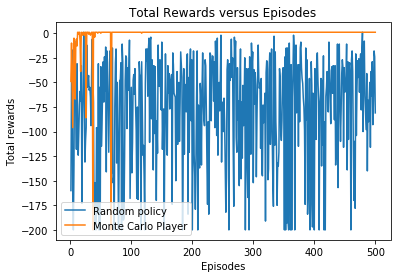

In [105]:
def playGridWorld(agent, xDim, yDim, numBlocks, transitProb, episodes=500, gamma = 0.8):
    """playGridWorld function:
                arguments: 
                agent: (object) the agent: Agent(random policy) or MonteCarloPlayer
                xDim, yDim: (int) height and width dimensions of the grid
                numBlocks: (int) number of blocked positions
                transitProb: (float) transition probability...between 0 and 1
                episodes: (int) number of episodes to play 
                gamma: (float) Discount factor for future rewards, between 0 and 1
    """
    agentName = "Random policy" if agent == Agent else "Monte Carlo Player"
    print("Playing with {}".format(agentName))
    totalRewards = []
    env = Environment(xDim, yDim, numBlocks, transitProb) #Create anvironment
    agent = agent(env.grid) #Create the agent 
    for i in range(episodes):
        env.reset()
        stateActionValues = []
        env.reset()
        presentState = env.state
        totalReward = 0
        t = 0
        while not presentState.isTerminal(): #Play until terminal state (Goal or Fire)
            t+= 1
            action = agent.getAction(presentState, i) #Agent takes action based on the present state
            print("Action selected: {}".format(action))
            nextState = env.nextStep(action) #Environment returns the next state based on the action
            print("Reward: {}".format(nextState.reward))
            reward = nextState.reward #Reward is returned based on the next state  
            totalReward +=reward
            stateActionValues.append([presentState.loc, action, 0 , t]) #Append this experience gained 
            #to memory. this serves as the training set for the MonteCarloAgent
            for stateActionValue in stateActionValues:
                stateActionValue[2] += gamma**(t- stateActionValue[3])*reward #Update the discounted action 
                #value for every past state encountered 
                #print(stateActionValue)
            presentState = nextState #Update the state
            if t == 200: #End game if there is no terminal state in 200 moves
                break
        if env.goalAchieved():
            print("You got to the goal!")
        else:
            print("You lost")
        totalRewards.append(totalReward)
        print("Total score: {}".format(totalReward))
        print("Game over")
        agent.learn(stateActionValues)
    plt.plot(range(1, episodes+1), totalRewards, label = agentName)
    plt.xlabel("Episodes")
    plt.ylabel("Total rewards")
    plt.title("Total Rewards versus Episodes")
    
#randomPolicy = Agent()
#player = MonteCarloPlayer(grid)
playGridWorld(Agent, 6,6,2,1)
playGridWorld(MonteCarloPlayer, 6,6,2,1)
plt.legend()